# 神经网络
> 神经网络算法能够提供一种复杂且非线性的假设模型

## 概述

为了描述神经网络，我们先从最简单的神经网络讲起，这个神经网络仅由一个“神经元”构成，以下即是这个“神经元”的图示：

<img src='SingleNeuron.png' width='40%'/>

这个“神经元”是一个以 $ x_1, x_2, x_3 $及截距 $+1$ 为输入值的运算单元，其输出为 $ h_{W,b}(x) = f(W^Tx) = f(\sum_{i=1}^3 W_{i}x_i +b)$ ，其中函数 $f : \Re \mapsto \Re$ 被称为“[激活函数](激活函数.ipynb)”

## 模型介绍

我们用圆圈来表示神经元，标注$"+1"$的圆圈被称为__偏置节点__，也就是方程中的截距项。神经网络最左边一层为__输入层__,最右边一层为__输出层__（上图中输出层只有一个单元），中间所有节点组成的所有层（上面的图只要一层隐藏层）叫做__隐藏层__。

<img src='400px-Network331.png'/>

### 模型符号化

* $n_l$来表示网络的层数。第$l$层记为$L_l$，输入层为$L_1$，输出层为$L_{n_l}$
* 参数$(W, b)  = (W^{(1)}, b^{(1)}, …, W^{(n_l)}, b^{(n_l)})$ 
* $W_{ij}^{(l)}$是第$l$层第$j$单元与第$l+1$层第$i$单元之间的连接参数（其实就是连接线上的权重）
* $b_i^{(l)}$是第$l+1$层第$i$单元的偏置项。
* $a_i^{(l)}$表示第$l$层第$i$单元的__激活项（输出值）__。当$l = 1$时，$a_i^{(l)}$，也就是第$i$个输入值（输入值的第$i$个特征）。

### __前向传播__

$$a_1^{(2)} = f(W_{11}^{(1)}x_1 + W_{12}^{(1)}x_2 +W_{13}^{(1)}x_3  + b_1^{(1)})$$
$$a_2^{(2)} = f(W_{21}^{(1)}x_1 + W_{22}^{(1)}x_2 +W_{23}^{(1)}x_3  + b_2^{(1)})$$
$$a_2^{(2)} = f(W_{31}^{(1)}x_1 + W_{32}^{(1)}x_2 +W_{33}^{(1)}x_3  + b_3^{(1)})$$
$$h_{W, b}(x) = a_1^{(3)} = f(W_{11}^{(2)}a_1^{(2)} + W_{12}^{(2)}a_2^{(2)} +W_{13}^{(2)}a_3^{(2)}  + b_1^{(1)})$$

* 用$z_i^{(l)}$表示第$l$层第$i$单元输入加权和（包括偏置单元）<br>
$$z_i^{(l+1)} = \sum_{j=1}^nW_{ij}^{(l)}x_j + b_i^{(l)}$$
$$a_i^{(l)} = f(z_i^{(l)})$$

* 通过矩阵-向量表述

将激活函数$f(\_)$扩展为用向量表示：$f([z_1,…, z_{n_l}]) = [f(z_1),…, f(z_{n_l})]$
上面的的等式可以更简洁地表示为：
$$z^{(2)} = W^{(1)}x + b^{(1)}$$
$$a^{(2)} = f(z^{(2)})$$
$$z^{(3)} = W^{(2)}a^{(2)} + b^{(2)}$$
$$h_{W, b} = a^{(3)} = f(z^{(3)})$$
将参数矩阵化，使用矩阵-向量运算方式，我们就可以利用线性代数的优势对神经网络进行快速求解。

给定第$l$层的激活值$a^{(l)}$后，第$l+1$层的激活值$a^{(l+1)}$计算步骤如下：
$$z^{(l+1)} = W^{(l)}x + b^{(l)}$$
$$a^{(l+1)} = f(z^{(l+1)})$$

神经网络可以包含多个隐藏层，也可以有多个输出单元。

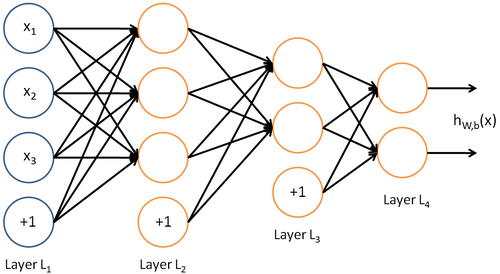

## 反向传播算法（BP算法）

对于单个样例$(x, y)$，其代价函数为：
$$J(W, b; x, y) = \frac{1}{2}||h_{W, b}(x) - y||^2$$
这是一个（二分之一的）方差代价函数。给定一个包含$m$个样例的数据集，定义整体代价函数为：
\begin{aligned}
J(W,b) & =[\frac{1}{m}\sum_{i=1}^mJ(W,b;x^{(i)},y_{(i)})]+\frac{\lambda}{2}\sum_{l=1}^{n_l-1}\sum_{i=1}^{s_l}\sum_{j=1}^{s_l+1}(W_{ij}^{(l)})^2\\
  &=[\frac{1}{m}\sum_{i=1}^{m}(\frac{1}{2}||h_{W,b}(x^{(i)})-y^{(i)}||^2)]+\frac{\lambda}{2}\sum_{l=1}^{n_l-1}\sum_{i=1}^{s_l}\sum_{j=1}^{s_l+1}(W_{ij}^{(l)})^2
\end{aligned}

上面公式中，第一项是一个均方差项，第二项是一个规则化项（也叫__权重衰减项__）

* 随机初始化$(W, b)$的目的是使__对称失效__<br>
针对参数$W$和$b$来求代价函数$J(W, b)$的最小值。为了求解神经网络,我们需要将每个参数$W_{ij}^{(l)}$和$b_i^{(l)}$初始化为一个很小的、接近零的随机值（比如，使用正态分布$Normal(0,\epsilon^2)$生成的随机值，其中$\epsilon$设置为$0.01$）,之后对目标函数使用诸如梯度下降法的最优化算法。因为$J(W, b)$是一个非凸函数，梯度下降法很可能会收敛到局部最优解；但是在实际应用中，梯度下降法通常能得到令人满意的结构。

* 梯度下降法中每次迭代都按照如下公式对参数$W$和$b$进行更新：
$$W_{ij}^{(l)}=W_{ij}^{(l)}-\alpha\frac{\partial}{\partial W_{ij}^{(l)}}J(W,b)$$
$$b_i^{(l)}=b_i^{(l)}-\alpha\frac{\partial}{\partial b_i^{(l)}}J(W, b)$$
其中$\alpha$是学习速率（每次迭代步长）。其中关键步骤就是计算偏导数。